<center><h1>Unraveling Patterns: A Comprehensive Examination of Homicides in the US Over a Decade</h1></center>
<center><h2>An Exploratory Data Analysis Project</h2></center>

# 1 Aims, Objectives and Background
## 1.1 Introduction

"At a homicide rate of approximately 5 per 100,000 population the United States by far has the highest homicide rate among affluent nations. This is a rate that has been fairly stable since 2000." [1]
<br>
The entangled interplay between crimes and society has always intrigued me, leading me to delve into criminal data and explore the different dynamics of criminal homicides in the US, a nation well known for having one of the highest rates of homicide in the world.
<br>
The analysis aims to explore patterns, correlations, and potential socioeconomic implications, promoting a better comprehension of American criminal dynamics.
## 1.2 Aims and Objectives:
Whithin this project, I would like to explore the following:
- Temporal Trends:
    - How has homicides rate changed over the years ? (2007-2017)
    - Identify yearly/seasonal patterns.
- Geographic Variations:
    - Identify homicides hotspots.
- Socio-economic Analysis:
    - Explore poverty levels in the top 100 lowest income cities/places in the US.
    - Identify the states that appear the most and identify any potential correlation with homicide rates.
- Demographic Analysis:
    - How do victim demographics (age, sex, race) vary across cities and states?
    - Are there any noticeable trends or patterns in victim demographics?
- Intersectional Analysis:
    - How do victim characteristics intersect with each other (e.g., age and race)?
    - Identify subgroups that are more prone to homicides.
- Case Disposition:
    - Explore disposition in different cities/states.
    - Is there any correlation between victim demographics and disposition?
    
This project aims to:
1. Find suitable, credible and ethical data
2. Collect different data types from different resources
3. Clean and preprocess CSV and webscraped data properly
4. Disect patterns and trends of the data showing that it is viable for further exploration
5. Try to identify new and unique correlations in the data

<br>
The researched questions posed in this project, such as, the socio-economic analysis has not been throughly explored and studied per research
Aims and Objectives will be conducted and evaluated through our exploratory data analysis (EDA) and the conslusions that we will draw through our exploration of the data.

## 1.3 Data
### 1.3.1 Choice of Data
For data, I have chosen a CSV file from Kaggle [(link)](https://www.kaggle.com/datasets/joebeachcapital/homicides) and I webscraped a table from Wikipedia [(link)](https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_poverty_rate).
Retrieving data from different resources using different tools has allowed me to practice my knowledge and also explore the topic from a wider lense. <br>
Other datasets were considered like the 'Homicide Reports, 1980-2014' dataset from Kaggle [(link)](https://www.kaggle.com/datasets/murderaccountability/homicide-reports) but it didn't contain enough diverse data to explore. Similarly, for the additional data, this website's article [(link)](https://www.usnews.com/news/health-news/slideshows/poorest-cities-in-the-us?onepage) was considered but it also didn't contain sufficient data to compare our main data with.
<br>
<br>
I decided to get a homicide dataset from Kaggle that contains more than 52,000 homicides over a decade in 50 US cities, and through my exploration I decided to webscrape additional data from Wikipedia that contained a list of US states/territories by poverty rate, as I wanted to also explore the socioeconomic correlation between criminal homicides rates and poverty rates.

The dataset from Kaggle contains extremly useful information about the victim (race, age and sex), the date the homicide was reported, the city and state where the homicide took place, latitude and longitude, and finally, disposition of the case.
The latter dataset contains very rich data that is extremely interesting to explore and disect. However, I was also intrigued to explore the correletions between homicide rates, population count and poverty rates.

### 1.3.2 Limitations and constraints of the Data
Finding suitable data on the web was the biggest challenge in this project, especially finding data about homicides in a website that allows webscraping, as I also wanted to explore the correlation between socioeconomic factors and homicides, I chose to webscrape some data about poverty rates in US states/territories and to try and identify any states that appear a lot in the list. Due to time and resources constraints, and unavailability of data, I wasn't able to find the most suitable/diverse data that I can merge with my main data file, as well as, finding data that belongs to the same time frame.
As a result, the timeframe of the homicides dataset is from 2007 to 2017. Whereas, the timeframe of the poverty dataset is between 2016 and 2020, so, there is an overlap of only 2 years. 

Moreover, the homicides dataset contains a lot of "Unknown" values. Despite, the intensive cleaning and preprocessing I applied to the data, including handling missing/null values and replacing them where suitable, the dataset contained a lot of "Unknown" values which I did not get rid of as it could possibly imbalance/disqualify the accuracy of the data.

## 1.4 Ethical Considerations
### 1.4.1 Source and Licensing
The Washington Post, a respectable news source, provided the dataset for this research. Data on more than 52,000 criminal killings that occurred in 50 of the biggest American cities during the previous ten years are included in the collection. The data contains the location of the killings, arrest histories, and the victims' basic demographic information. The Washington Post put a lot of work into gathering, organising, and standardising data, and they verified correctness by cross-referencing their records with FBI data.

Public access is granted to the dataset as indicated in the description of the source. Respecting the licencing agreements and terms of usage linked to the dataset is essential, though. These factors support openness and legal framework compliance while also being consistent with ethical data usage standards.
### 1.4.2 Usage and Attribution
In the analysis conducted for this project, extra care was taken to ensure responsible usage of data. The Washington Post is credited with any conclusions, insights or findings that come from the Kaggle dataset. Moreover, proper citation has been maintained throught the project to give proper credit to the data provider. As for the Wikipedia webscraped data, Wikipedia's content is available under Creative Commons licenses, which require proper attribution. The terms of use and licensing agreements associated with Wikipedia have been respected in the collection and usage of this data.

### 1.4.3 Additional Considerations
The analysis's main focus is on understanding patterns and correlations related to criminal homicides in the US. Efforts have been made to avoid baseless/harmful assumptions or stereotypes and to alleviate potential biases in the dataset, a proper examination of the data has been conducted.
Furthermore, given the collaborative nature of Wikepedia, there is potential of bias and innacuracy. The latter has been taken into consideration throught the analysis.
Finally, the data processing pipeline steps are well-documented ensuring transparency and reproductivity.

In [1]:
# pandas, numpy, matplotlib, seaborn, geopandas, folium, beautifulSoup, calendar, requests

In [2]:
# pip install session_info

In [3]:
#import needed libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import geopandas as gpd
import folium

# Set style for seaborn for better readability
sns.set(style="whitegrid")

%matplotlib inline 

## 2 Homicides Data Processing
### 2.1 Data Aquisition and initial exploration
The Homicide dataset has been downloaded from the Kaggle website [(link)](https://www.kaggle.com/datasets/joebeachcapital/homicides), and then the following exploration and preprocessing has been applied:
- 1. Converting date column to datetime type
- 2. Dropping irrelevant columns
- 3. Checking percentage of null/"Unknown" values
- 4. Identifying the timeframe of the data
- 5. Checking unique values of columns
- 6. Handling null/invalid values
- 7. Converting columns to suitable types
- 8. Replacement of abbreviated names in columns
- 9. Seperation of date column to year, month and day

In [4]:
raw_data = pd.read_csv('homicide.csv', encoding='unicode_escape') # Import the dataset

In [5]:
# print first 5 rows of dataset
raw_data.head()

,uid,reported_date,victim_last,victim_first,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition
0,Alb-000001,20100504,GARCIA,JUAN,Hispanic,78,Male,Albuquerque,NM,35.095788,-106.538555,Closed without arrest
1,Alb-000002,20100216,MONTOYA,CAMERON,Hispanic,17,Male,Albuquerque,NM,35.056810,-106.715321,Closed by arrest
2,Alb-000003,20100601,SATTERFIELD,VIVIANA,White,15,Female,Albuquerque,NM,35.086092,-106.695568,Closed without arrest
3,Alb-000004,20100101,MENDIOLA,CARLOS,Hispanic,32,Male,Albuquerque,NM,35.078493,-106.556094,Closed by arrest
4,Alb-000005,20100102,MULA,VIVIAN,White,72,Female,Albuquerque,NM,35.130357,-106.580986,Closed without arrest


In [6]:
# print last 5 rows of dataset
raw_data.tail()

,uid,reported_date,victim_last,victim_first,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition
52174,Was-001380,20160908,WILLIAMS,EVAN,Black,29,Male,Washington,DC,38.828704,-77.002075,Closed by arrest
52175,Was-001381,20160913,SMITH,DEON,Black,19,Male,Washington,DC,38.822852,-77.001725,Open/No arrest
52176,Was-001382,20161114,WASHINGTON,WILLIE,Black,23,Male,Washington,DC,38.828025,-77.002511,Open/No arrest
52177,Was-001383,20161130,BARNES,MARCUS,Black,24,Male,Washington,DC,38.820476,-77.008640,Open/No arrest
52178,Was-001384,20160901,JACKSON,KEVIN,Black,17,Male,Washington,DC,38.866689,-76.982409,Closed by arrest


In [7]:
# check types of columns
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52179 entries, 0 to 52178
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   uid            52179 non-null  object 
 1   reported_date  52179 non-null  int64  
 2   victim_last    52178 non-null  object 
 3   victim_first   52179 non-null  object 
 4   victim_race    52179 non-null  object 
 5   victim_age     52179 non-null  object 
 6   victim_sex     52179 non-null  object 
 7   city           52179 non-null  object 
 8   state          52179 non-null  object 
 9   lat            52119 non-null  float64
 10  lon            52119 non-null  float64
 11  disposition    52179 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 4.8+ MB


## 2.2 Homicides Data preprocessing and cleaning
### Converting the reported date column into datetime type
The following code converts the reported date column to a suitable type (datetime) using pandas' to_datetime function:

In [8]:
# convert reported_date column to datetime type
try:
    raw_data['reported_date'] = pd.to_datetime(raw_data['reported_date'].astype(str).apply(lambda date: f'{date[:4]}-{date[4:6]}-{date[6:8]}'),format='%Y-%m-%d')
except Exception as e:
    print(e)

In [9]:
# recheck types of columns
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52179 entries, 0 to 52178
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   uid            52179 non-null  object        
 1   reported_date  52179 non-null  datetime64[ns]
 2   victim_last    52178 non-null  object        
 3   victim_first   52179 non-null  object        
 4   victim_race    52179 non-null  object        
 5   victim_age     52179 non-null  object        
 6   victim_sex     52179 non-null  object        
 7   city           52179 non-null  object        
 8   state          52179 non-null  object        
 9   lat            52119 non-null  float64       
 10  lon            52119 non-null  float64       
 11  disposition    52179 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 4.8+ MB


### Dropping irrelevant columns
The drop function was used to drop the victim's last and first name columns, as they are not significant in our analysis:

In [10]:
#dropping victim's last and first name columns as they are not relevant to our EDA
raw_data = raw_data.drop(columns=['victim_last', 'victim_first'])
raw_data

,uid,reported_date,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition
0,Alb-000001,2010-05-04,Hispanic,78,Male,Albuquerque,NM,35.095788,-106.538555,Closed without arrest
1,Alb-000002,2010-02-16,Hispanic,17,Male,Albuquerque,NM,35.056810,-106.715321,Closed by arrest
2,Alb-000003,2010-06-01,White,15,Female,Albuquerque,NM,35.086092,-106.695568,Closed without arrest
3,Alb-000004,2010-01-01,Hispanic,32,Male,Albuquerque,NM,35.078493,-106.556094,Closed by arrest
4,Alb-000005,2010-01-02,White,72,Female,Albuquerque,NM,35.130357,-106.580986,Closed without arrest
...,...,...,...,...,...,...,...,...,...,...
52174,Was-001380,2016-09-08,Black,29,Male,Washington,DC,38.828704,-77.002075,Closed by arrest
52175,Was-001381,2016-09-13,Black,19,Male,Washington,DC,38.822852,-77.001725,Open/No arrest
52176,Was-001382,2016-11-14,Black,23,Male,Washington,DC,38.828025,-77.002511,Open/No arrest
52177,Was-001383,2016-11-30,Black,24,Male,Washington,DC,38.820476,-77.008640,Open/No arrest


### Checking null/invalid/"Unknown" values
The next step is to check for null/invalid or "unknown" values in the dataset, and check their sum/percentage to determine the suitable method to handle them:

In [11]:
# checking sum of null values
raw_data.isnull().sum()

uid               0
reported_date     0
victim_race       0
victim_age        0
victim_sex        0
city              0
state             0
lat              60
lon              60
disposition       0
dtype: int64

In [12]:
# percentage of missing/null values in each column of the dataframe
raw_data.isnull().mean().mul(100)

uid              0.000000
reported_date    0.000000
victim_race      0.000000
victim_age       0.000000
victim_sex       0.000000
city             0.000000
state            0.000000
lat              0.114989
lon              0.114989
disposition      0.000000
dtype: float64

In [13]:
#checking ratio of unknown race to known race
race_unknown = raw_data[(raw_data.victim_race == 'Unknown')].shape[0]
race_known = raw_data[(raw_data.victim_race != 'Unknown')].shape[0]
print(f"Unknown race count: {race_unknown}")
print(f"Known race count: {race_known}")

#calculate percantage of unknown race
race_percent = race_unknown/(race_unknown + race_known)*100
print(f"Percantage of unknown race: {race_percent:.{2}f}" + "%")

Unknown race count: 4199
Known race count: 47980
Percantage of unknown race: 8.05%


In [14]:
#checking ratio of unknown age to known age
age_unknown = raw_data[(raw_data.victim_age == 'Unknown')].shape[0]
age_known = raw_data[(raw_data.victim_age != 'Unknown')].shape[0]
print(f"Unknown age count: {age_unknown}")
print(f"Known age count: {age_known}")

#calculate percantage  of unknown age
age_percent = age_unknown/(age_unknown + age_known)*100
print(f"Percantage of unknown age: {age_percent:.{2}f}" + "%")

Unknown age count: 2999
Known age count: 49180
Percantage of unknown age: 5.75%


In [15]:
#checking ratio of unknown sex to known sex
sex_unknown = raw_data[(raw_data.victim_sex == 'Unknown')].shape[0]
sex_known = raw_data[(raw_data.victim_sex != 'Unknown')].shape[0]
print(f"Unknown sex count: {sex_unknown}")
print(f"Known sex count: {sex_known}")

#calculate percantage of unknown sex
sex_percent = sex_unknown/(sex_unknown + sex_known)*100
print(f"Percantage of unknown sex: {sex_percent:.{2}f}" + "%")

Unknown sex count: 4231
Known sex count: 47948
Percantage of unknown sex: 8.11%


In [16]:
#checking ratio of unknown disposition to known disposition
disp_unknown = raw_data[(raw_data.disposition == 'Unknown')].shape[0]
disp_known = raw_data[(raw_data.disposition != 'Unknown')].shape[0]
print(f"Unknown disposition count: {disp_unknown}")
print(f"Known disposition count: {disp_known}")

Unknown disposition count: 0
Known disposition count: 52179


In [17]:
#printing oldest and most recent dates
recent_date = raw_data["reported_date"].max()
old_date = raw_data["reported_date"].min()
# Print the results
print(f"Most Recent Date: {recent_date}")
print(f"Oldest Date: {old_date}")

Most Recent Date: 2017-12-31 00:00:00
Oldest Date: 2007-01-01 00:00:00


### Checking unique values in columns
Next, we will use the unique() function to print out unique values in columns, so we can identify invalid values and also check their dtype.

In [18]:
# printing columns names
raw_data.columns

Index(['uid', 'reported_date', 'victim_race', 'victim_age', 'victim_sex',
       'city', 'state', 'lat', 'lon', 'disposition'],
      dtype='object')

In [19]:
# checking all unique values in disposition column
raw_data['disposition'].unique()

array(['Closed without arrest', 'Closed by arrest', 'Open/No arrest'],
      dtype=object)

In [20]:
# checking all unique values victim_age column
raw_data['victim_age'].unique()

array(['78', '17', '15', '32', '72', '91', '52', '56', '43', '20',
       'Unknown', '46', '16', '54', '22', '49', '25', '47', '88', '27',
       '36', '1', '58', '42', '50', '3', '21', '19', '95', '24', '41',
       '51', '18', '8', '64', '30', '2', '39', '45', '31', '0', '23',
       '28', '35', '26', '40', '94', '33', '57', '55', '29', '53', '66',
       '5', '74', '69', '37', '59', '34', '38', '44', '14', '9', '65',
       '90', '48', '62', '60', '4', '70', '10', '11', '63', '6', '73',
       '75', '68', '101', '13', '77', '92', '71', '82', '61', '12', '84',
       '76', '67', '81', '89', '83', '85', '80', '86', '79', '97', '7',
       '96', '87', '93', '99', '102'], dtype=object)

### Handling invalid and 'Unknown' values in the victim age column
The victim_age column contains 'Unknown' values and zeros, which are both invalid values for this column. Thus, we started with replacing the 'Unknown' values with pandas' NA. The result of the sum of NA values is 2999 which represents 5.75% of the column as calculated previously, hence, we can impute missing/invalid ages using statistical methods, such as, with the median age to not mess up our calculations and analysis.
Finally, the victim age column was converted to the appropriate type (int16).

In [21]:
# replace Unknown values with NaN to represent missing data
raw_data.loc[:, 'victim_age'] = raw_data['victim_age'].replace('Unknown', pd.NA)

In [22]:
# checking if Unknown was replaced with <NA>
raw_data['victim_age'].unique()

array(['78', '17', '15', '32', '72', '91', '52', '56', '43', '20', <NA>,
       '46', '16', '54', '22', '49', '25', '47', '88', '27', '36', '1',
       '58', '42', '50', '3', '21', '19', '95', '24', '41', '51', '18',
       '8', '64', '30', '2', '39', '45', '31', '0', '23', '28', '35',
       '26', '40', '94', '33', '57', '55', '29', '53', '66', '5', '74',
       '69', '37', '59', '34', '38', '44', '14', '9', '65', '90', '48',
       '62', '60', '4', '70', '10', '11', '63', '6', '73', '75', '68',
       '101', '13', '77', '92', '71', '82', '61', '12', '84', '76', '67',
       '81', '89', '83', '85', '80', '86', '79', '97', '7', '96', '87',
       '93', '99', '102'], dtype=object)

In [23]:
# sum of na values
raw_data['victim_age'].isna().sum()

2999

In [24]:
# replace 0 values with NaN to represent missing data
raw_data['victim_age'] = raw_data['victim_age'].replace('0',pd.NA)
# replace missing ages with median age
median_age = raw_data['victim_age'].median()
raw_data['victim_age'] = raw_data['victim_age'].fillna(median_age)

In [25]:
# checking if there are any NaN values left
raw_data['victim_age'].isna().sum()

0

In [26]:
# checking if there any zeros left in the age column
null_age = raw_data[(raw_data.victim_age == '0')].shape[0]
print(null_age)

0


In [27]:
# printing all unique values to verify
raw_data['victim_age'].unique()

array(['78', '17', '15', '32', '72', '91', '52', '56', '43', '20', 29.0,
       '46', '16', '54', '22', '49', '25', '47', '88', '27', '36', '1',
       '58', '42', '50', '3', '21', '19', '95', '24', '41', '51', '18',
       '8', '64', '30', '2', '39', '45', '31', '23', '28', '35', '26',
       '40', '94', '33', '57', '55', '29', '53', '66', '5', '74', '69',
       '37', '59', '34', '38', '44', '14', '9', '65', '90', '48', '62',
       '60', '4', '70', '10', '11', '63', '6', '73', '75', '68', '101',
       '13', '77', '92', '71', '82', '61', '12', '84', '76', '67', '81',
       '89', '83', '85', '80', '86', '79', '97', '7', '96', '87', '93',
       '99', '102'], dtype=object)

In [28]:
# checking if there any zeros left in the age column
null_age = raw_data[(raw_data.victim_age == '0')].shape[0]
print(null_age)

0


In [29]:
# converting to numeric
raw_data['victim_age'] = pd.to_numeric(raw_data['victim_age'], errors='coerce')

In [30]:
# checking victim_age column type
raw_data['victim_age'].dtype

dtype('float64')

In [31]:
# Convert victim_age column to int16
raw_data['victim_age'] = raw_data['victim_age'].astype('int16')

In [32]:
# check type
print(raw_data['victim_age'].dtype)

int16


In [33]:
#chck type of all columns
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52179 entries, 0 to 52178
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   uid            52179 non-null  object        
 1   reported_date  52179 non-null  datetime64[ns]
 2   victim_race    52179 non-null  object        
 3   victim_age     52179 non-null  int16         
 4   victim_sex     52179 non-null  object        
 5   city           52179 non-null  object        
 6   state          52179 non-null  object        
 7   lat            52119 non-null  float64       
 8   lon            52119 non-null  float64       
 9   disposition    52179 non-null  object        
dtypes: datetime64[ns](1), float64(2), int16(1), object(6)
memory usage: 3.7+ MB


In [34]:
# check unique values and type
raw_data['victim_age'].unique()

array([ 78,  17,  15,  32,  72,  91,  52,  56,  43,  20,  29,  46,  16,
        54,  22,  49,  25,  47,  88,  27,  36,   1,  58,  42,  50,   3,
        21,  19,  95,  24,  41,  51,  18,   8,  64,  30,   2,  39,  45,
        31,  23,  28,  35,  26,  40,  94,  33,  57,  55,  53,  66,   5,
        74,  69,  37,  59,  34,  38,  44,  14,   9,  65,  90,  48,  62,
        60,   4,  70,  10,  11,  63,   6,  73,  75,  68, 101,  13,  77,
        92,  71,  82,  61,  12,  84,  76,  67,  81,  89,  83,  85,  80,
        86,  79,  97,   7,  96,  87,  93,  99, 102], dtype=int16)

In [35]:
# checking if there any zeros left in the age column
null_age = raw_data[(raw_data.victim_age == 0)].shape[0]
print(null_age)

0


In [36]:
#checking min and max age
oldest_age = raw_data["victim_age"].max()
youngest_age = raw_data["victim_age"].min()
# Print the results
print(f"Oldest victim: {oldest_age}")
print(f"Youngest victim: {youngest_age}")

Oldest victim: 102
Youngest victim: 1


### Final steps of data cleaning
At last, we renamed the data after it has been processed and applied some final touchs, such as replacing abbreviated state names with full names, seperating reported date column to year, month and day, and finally, substituting months from numbers to words.

In [37]:
#renaming the df after pre-processing and cleaning (hom_df = homicide dataframe)
hom_df = raw_data.copy()

In [38]:
hom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52179 entries, 0 to 52178
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   uid            52179 non-null  object        
 1   reported_date  52179 non-null  datetime64[ns]
 2   victim_race    52179 non-null  object        
 3   victim_age     52179 non-null  int16         
 4   victim_sex     52179 non-null  object        
 5   city           52179 non-null  object        
 6   state          52179 non-null  object        
 7   lat            52119 non-null  float64       
 8   lon            52119 non-null  float64       
 9   disposition    52179 non-null  object        
dtypes: datetime64[ns](1), float64(2), int16(1), object(6)
memory usage: 3.7+ MB


In [39]:
#printing all cities/states unique values
# states
states = [ state for state in hom_df['state'].unique() ] # this is list, original is numpy.ndarray
print(states, "\n")

# cities
cities = [ city for city in hom_df['city'].unique() ]
print(cities)

['NM', 'GA', 'MD', 'LA', 'AL', 'MA', 'NY', 'NC', 'IL', 'OH', 'TX', 'CO', 'MI', 'CA', 'IN', 'FL', 'MO', 'NV', 'KY', 'TN', 'wI', 'MN', 'OK', 'NE', 'PA', 'AZ', 'VA', 'DC'] 

['Albuquerque', 'Atlanta', 'Baltimore', 'Baton Rouge', 'Birmingham', 'Boston', 'Buffalo', 'Charlotte', 'Chicago', 'Cincinnati', 'Columbus', 'Dallas', 'Denver', 'Detroit', 'Durham', 'Fort Worth', 'Fresno', 'Houston', 'Indianapolis', 'Jacksonville', 'Kansas City', 'Las Vegas', 'Long Beach', 'Los Angeles', 'Louisville', 'Memphis', 'Miami', 'Milwaukee', 'Minneapolis', 'Nashville', 'New Orleans', 'New York', 'Oakland', 'Oklahoma City', 'Omaha', 'Philadelphia', 'Phoenix', 'Pittsburgh', 'Richmond', 'San Antonio', 'Sacramento', 'Savannah', 'San Bernardino', 'San Diego', 'San Francisco', 'St. Louis', 'Stockton', 'Tampa', 'Tulsa', 'Washington']


In [40]:
# Replacing abbreviated state names to full names
state_dict = {'NM': 'New Mexico','GA': 'Georgia','MD': 'Maryland','LA': 'Louisiana',
'AL': 'Alabama','MA': 'Massachusetts','NY': 'New York','NC': 'North Carolina','IL': 'Illinois',
'OH': 'Ohio','TX': 'Texas','CO': 'Colorado','MI': 'Michigan','CA': 'California','IN': 'Indiana','FL': 'Florida',
'MO': 'Missouri','NV': 'Nevada','KY': 'Kentucky','TN': 'Tennessee','wI': 'Wisconsin','MN': 'Minnesota','OK': 'Oklahoma',
'NE': 'Nebraska','PA': 'Pennsylvania','AZ': 'Arizona','VA': 'Virginia','DC': 'District of Columbia'}
hom_df['state'] = hom_df['state'].map(state_dict)

In [41]:
# Seperating year, month and day into sparate columns
hom_df['reported_year'] = hom_df['reported_date'].dt.year
hom_df['reported_month'] = hom_df['reported_date'].dt.month
hom_df['reported_day'] = hom_df['reported_date'].dt.day

In [42]:
# print first 5 rows of dataset
hom_df.head()

,uid,reported_date,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition,reported_year,reported_month,reported_day
0,Alb-000001,2010-05-04,Hispanic,78,Male,Albuquerque,New Mexico,35.095788,-106.538555,Closed without arrest,2010,5,4
1,Alb-000002,2010-02-16,Hispanic,17,Male,Albuquerque,New Mexico,35.056810,-106.715321,Closed by arrest,2010,2,16
2,Alb-000003,2010-06-01,White,15,Female,Albuquerque,New Mexico,35.086092,-106.695568,Closed without arrest,2010,6,1
3,Alb-000004,2010-01-01,Hispanic,32,Male,Albuquerque,New Mexico,35.078493,-106.556094,Closed by arrest,2010,1,1
4,Alb-000005,2010-01-02,White,72,Female,Albuquerque,New Mexico,35.130357,-106.580986,Closed without arrest,2010,1,2


In [43]:
# Replacing month column with actual month names
month_dict = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

hom_df['reported_month'] = hom_df['reported_month'].map(month_dict)

In [44]:
# printing first five rows of dataset
hom_df.head()

,uid,reported_date,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition,reported_year,reported_month,reported_day
0,Alb-000001,2010-05-04,Hispanic,78,Male,Albuquerque,New Mexico,35.095788,-106.538555,Closed without arrest,2010,May,4
1,Alb-000002,2010-02-16,Hispanic,17,Male,Albuquerque,New Mexico,35.056810,-106.715321,Closed by arrest,2010,February,16
2,Alb-000003,2010-06-01,White,15,Female,Albuquerque,New Mexico,35.086092,-106.695568,Closed without arrest,2010,June,1
3,Alb-000004,2010-01-01,Hispanic,32,Male,Albuquerque,New Mexico,35.078493,-106.556094,Closed by arrest,2010,January,1
4,Alb-000005,2010-01-02,White,72,Female,Albuquerque,New Mexico,35.130357,-106.580986,Closed without arrest,2010,January,2


## 3 Exploratory data analysis
### 3.1 Temporal Analyis
The first thing to explore is temporal dynamics, and to try to investigate the change of homicides count over the years and identify yearly/seasonal patterns.

In [45]:
# Create a count column
hom_df['crime_count'] = 1

# Use groupby to aggregate the count of crimes per year
crime_by_year = hom_df.groupby('reported_year')['crime_count'].sum().reset_index()

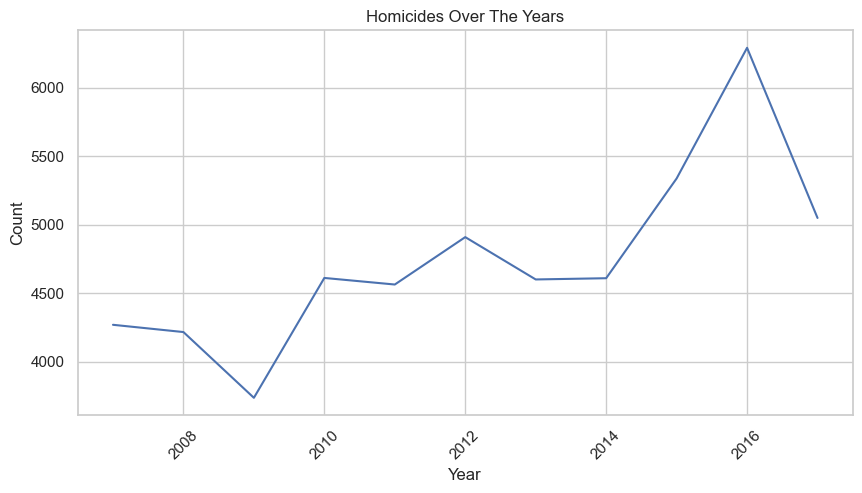

In [46]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=crime_by_year, x='reported_year', y='crime_count')
# set labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Homicides Over The Years')
# rotate x-axix abels for better readability
plt.xticks(rotation=45)

# display the plot
plt.show()

In the graph above, we can see that there were two major changes in homicide rate over the years. First, there was a major drop in 2009 and second, an exponential jump in 2016. <br>
The overall fluctuation of the line graph suggest that crimes have been increasing since 2009 and are significantly starting to majorly decrease starting from 2016.

In [47]:
import calendar

# Use groupby to aggregate the count of crimes per month
crime_by_month = hom_df.groupby('reported_month')['crime_count'].sum().reset_index()

# Convert the 'reported_month' column to a categorical type with a custom order
ordered_months = [calendar.month_name[i] for i in range(1, 13)]
crime_by_month['reported_month'] = pd.Categorical(crime_by_month['reported_month'], categories=ordered_months, ordered=True)

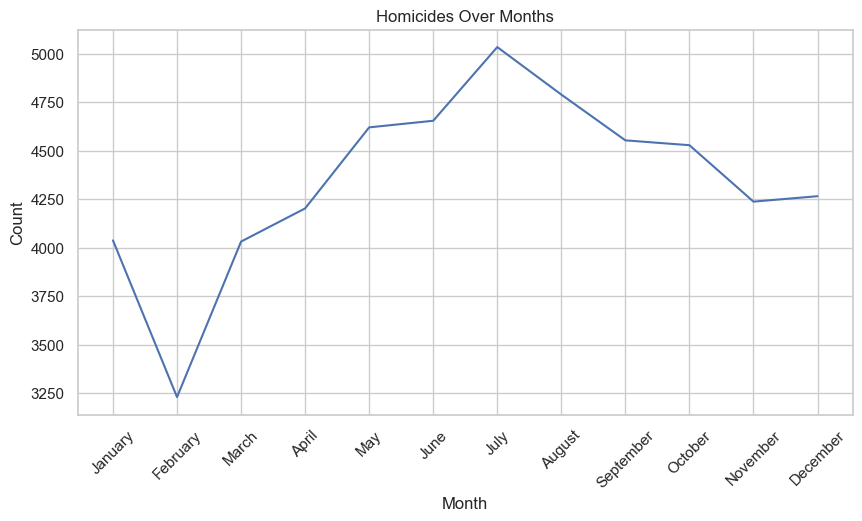

In [48]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=crime_by_month, x='reported_month', y='crime_count')

# set labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Homicides Over Months')
# rotate x-axix abels for better readability
plt.xticks(rotation=45)
# display the plot
plt.show()

Here, we can clearly observe a large increase in homicides during the month of July, on the contrast a significant drop on February. The latter observation could mean that homicides increase during the hottest month in the United States(July)[2], and decrease on the coldest months (December, January, February)[3]

### 3.2 Geographic Variations
Next, we will explore homicides hotspots in the United States.

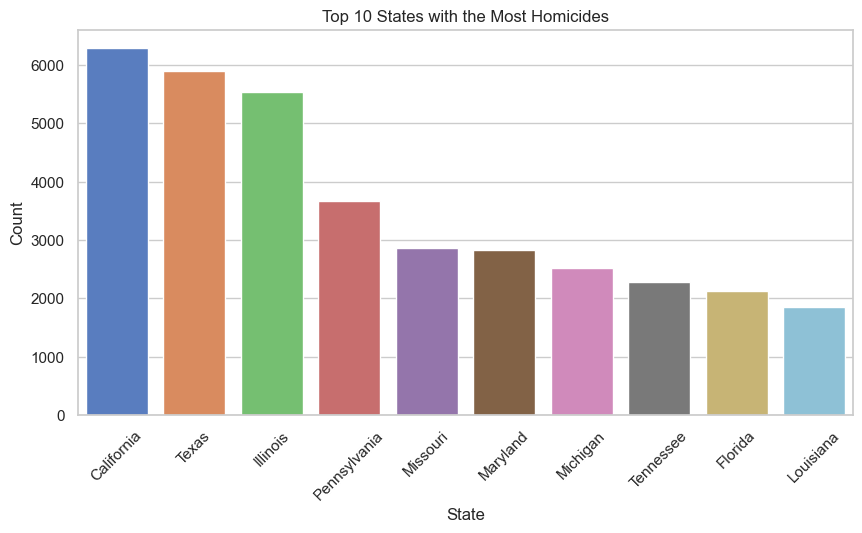

In [49]:
plt.figure(figsize=(10, 5))
sns.countplot(data=hom_df, x='state', order=hom_df['state'].value_counts().index[:10], palette='muted')

# set labels and title
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Top 10 States with the Most Homicides')
# rotate x-axix abels for better readability
plt.xticks(rotation=45)
# display the plot
plt.show()

Here, we can see the top 10 states with the highest homicide count, starting from the top 3 (California, Texas, Illinois)

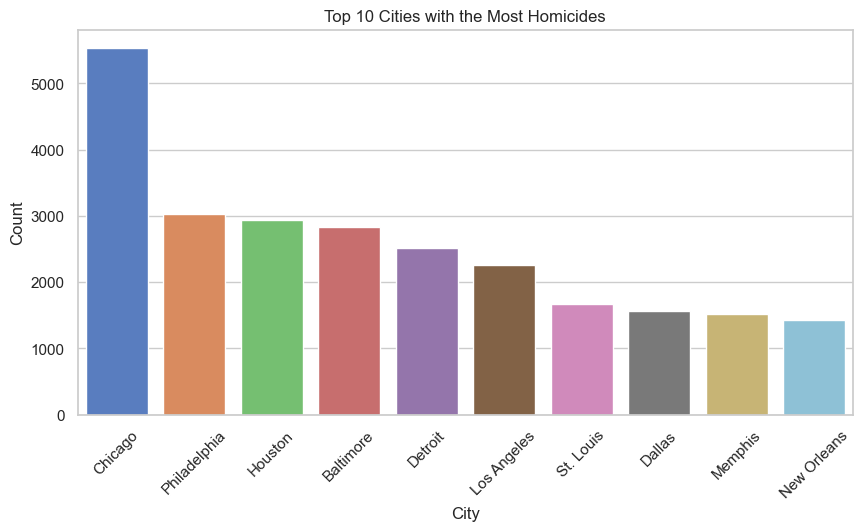

In [50]:
plt.figure(figsize=(10, 5))
sns.countplot(data=hom_df, x='city', order=hom_df['city'].value_counts().index[:10], palette='muted')

# set labels and title
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Top 10 Cities with the Most Homicides')
# rotate x-axix abels for better readability
plt.xticks(rotation=45)
# display the plot
plt.show()

Similarly, the above graph shows Here, we can see the top 10 cities with the highest homicide count, starting from the top 3 (Chicago, Philadelphia, Houston)

## 3.3 Socio-economic Analysis
### 3.3.1 Web Scraping Additional Data
After getting the top 10 US states with homicides, we will be getting additional data by webscraping a table from a Wikipedia page that contains states/territories in the US their population, population under poverty line and poverty rate to investigate the correlations between socio-economic factors and homicide rates in US states.

In [51]:
# import beautiful soup library
from bs4 import BeautifulSoup

In [52]:
# import requests library
import requests

### Webscraping the page
The following code, checks if the webpage is available and returns the content if there were no errors:

In [53]:
# set a user-agent to be sent with request
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

r  = requests.get("https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_poverty_rate", headers=headers)

# Check if the request was successful (status code 200)
if r.status_code == 200:
    # put the text that is returned in the response in a variable
    web_data = r.text
    print(web_data)
else:
    print(f"Failed to retrieve the webpage. Status code: {r.status_code}")

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-toc-available" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>List of U.S. states and territories by poverty rate - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabl

In [54]:
print(r.status_code)

200


In [55]:
# parse the raw HTML into a 'soup' object
soup = BeautifulSoup(web_data, "html.parser")
soup

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of U.S. states and territories by poverty rate - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disa

### Getting the target table
In the following steps, we will be extracting the relevant table from the webpage and preprocessing it into a proper format so we can store it as a pandas dataframe.

In [56]:
# get target table
target_table = soup.find('table', class_='wikitable sortable mw-datatable static-row-numbers sticky-header')
print(target_table)

<table class="wikitable sortable mw-datatable static-row-numbers sticky-header" style="text-align:right">
<caption>Poverty rate by state or territory, 2016-2020
</caption>
<tbody><tr class="static-row-header" style="vertical-align:bottom">
<th>State or territory
</th>
<th><abbr title="Population for which poverty status has been determined">Population</abbr>
</th>
<th>Population under<br/>poverty line
</th>
<th>Poverty rate
</th></tr>
<tr class="boilerplate metadata plainlinks tfd" id="tfd" style="background-color: transparent; padding: 0; font-size:85%; color:#000000; text-align: center; border-bottom:1px solid #AAAAAA; overflow:hidden;">
<th style="background-position:center;line-height:100%;"> </th>
<th style="background-position:center"> </th>
<th style="background-position:center"> </th>
<th style="background-position:center">
</th></tr>
<tr>
<td style="text-align:left"><span class="flagicon" style="display:inline-block;width:25px;"><span class="mw-image-border" typeof="mw:File"><

### 3.3.2 Preprocessing/Cleaning Webscraped Data
The following preprocessing and cleaning of the data has been applied:
- 1. Getting all table rows
- 2. Getting table headers
- 3. Storing table rows in a 2D list
- 4. Removing empty lists
- 5. Identifying and extracting relevant rows
- 6. Storing the cleaned data into a Pandas Dataframe
- 7. Saving the Dataframe into a CSV file
- 8. Converting columns to appropriate type

In [57]:
# Find all rows in the table
rows = soup.find_all('tr')

In [58]:
# Extract header data
header = [th.text.strip() for th in rows[0].find_all('th')]
print(header)

['State or territory', 'Population', 'Population underpoverty line', 'Poverty rate']


In [59]:
# Initialize empty list to store the rows of data
data = []

# Loop through the rows, starting from the second row (index 1)
for row in rows[1:]:
    # Extract the data from each cell in the row
    row_data = [td.text.strip() for td in row.find_all('td')]
    # Append the row data to the list
    data.append(row_data)
    
print(data)

[[], ['Puerto Rico', '3,227,457', '1,400,958', '43.41%'], ['Mississippi', '2,883,074', '564,439', '19.58%'], ['Louisiana', '4,532,187', '845,230', '18.65%'], ['New Mexico', '2,053,909', '381,026', '18.55%'], ['West Virginia', '1,755,591', '300,152', '17.10%'], ['Kentucky', '4,322,881', '717,895', '16.61%'], ['Arkansas', '2,923,585', '470,190', '16.08%'], ['Alabama', '4,771,614', '762,642', '15.98%'], ['District of Columbia', '669,089', '103,391', '15.45%'], ['Oklahoma', '3,833,712', '585,520', '15.27%'], ['South Carolina', '4,950,181', '726,470', '14.68%'], ['Tennessee', '6,603,468', '965,213', '14.62%'], ['Georgia', '10,238,369', '1,461,572', '14.28%'], ['Texas', '28,013,446', '3,984,260', '14.22%'], ['Arizona', '7,012,999', '990,528', '14.12%'], ['North Carolina', '10,098,330', '1,411,939', '13.98%'], ['Michigan', '9,753,541', '1,337,256', '13.71%'], ['Ohio', '11,350,378', '1,546,011', '13.62%'], ['New York', '19,009,098', '2,581,048', '13.58%'], ['Florida', '20,793,628', '2,772,939'

In [60]:
# Remove empty lists from data
cleaned_data = [row for row in data if row]

#identify last row
end_row = ['Northern Mariana Islands', '52.3%']

try:
    end_index = cleaned_data.index(end_row)
except ValueError:
    end_index = len(cleaned_data)
    
# Extract relevant rows containing state-level poverty rate data
relevant_data = cleaned_data[1:end_index]

# Display the cleaned and relevant data
for row in relevant_data:
    print(row)

['Mississippi', '2,883,074', '564,439', '19.58%']
['Louisiana', '4,532,187', '845,230', '18.65%']
['New Mexico', '2,053,909', '381,026', '18.55%']
['West Virginia', '1,755,591', '300,152', '17.10%']
['Kentucky', '4,322,881', '717,895', '16.61%']
['Arkansas', '2,923,585', '470,190', '16.08%']
['Alabama', '4,771,614', '762,642', '15.98%']
['District of Columbia', '669,089', '103,391', '15.45%']
['Oklahoma', '3,833,712', '585,520', '15.27%']
['South Carolina', '4,950,181', '726,470', '14.68%']
['Tennessee', '6,603,468', '965,213', '14.62%']
['Georgia', '10,238,369', '1,461,572', '14.28%']
['Texas', '28,013,446', '3,984,260', '14.22%']
['Arizona', '7,012,999', '990,528', '14.12%']
['North Carolina', '10,098,330', '1,411,939', '13.98%']
['Michigan', '9,753,541', '1,337,256', '13.71%']
['Ohio', '11,350,378', '1,546,011', '13.62%']
['New York', '19,009,098', '2,581,048', '13.58%']
['Florida', '20,793,628', '2,772,939', '13.34%']
['Missouri', '5,942,813', '772,992', '13.01%']
['Indiana', '6,49

In [61]:
# Create a DataFrame with the header and data
poverty_df = pd.DataFrame(relevant_data, columns=header)

### Saving the dataframe into a CSV

In [62]:
# Save the DataFrame to a CSV file incase of website unavailability
filename = 'poverty.csv'
poverty_df.to_csv(filename, index=False)

### Table Cleaning
After converting the table into a dataframe and saving it into a CSV file, we will be further cleaning the data by converting the columns to suitable types and getting rid of special characters in integer columns.

In [63]:
# checking column types
poverty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   State or territory            51 non-null     object
 1   Population                    51 non-null     object
 2   Population underpoverty line  51 non-null     object
 3   Poverty rate                  51 non-null     object
dtypes: object(4)
memory usage: 1.7+ KB


In [64]:
# Convert 'Population' column to numeric
poverty_df['Population'] = pd.to_numeric(poverty_df['Population'].str.replace(',', ''))
# Convert 'Population underpoverty line' column to numeric
poverty_df['Population underpoverty line'] = pd.to_numeric(poverty_df['Population underpoverty line'].str.replace(',', ''))

In [65]:
# checking column types again
poverty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   State or territory            51 non-null     object
 1   Population                    51 non-null     int64 
 2   Population underpoverty line  51 non-null     int64 
 3   Poverty rate                  51 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.7+ KB


In [66]:
# converting poverty rate column to numeric and striping '%'
poverty_df['Poverty rate'] = pd.to_numeric(poverty_df['Poverty rate'].str.rstrip('%'))

In [67]:
poverty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   State or territory            51 non-null     object 
 1   Population                    51 non-null     int64  
 2   Population underpoverty line  51 non-null     int64  
 3   Poverty rate                  51 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.7+ KB


In [68]:
# print entire dataframe after pre-processing
poverty_df

,State or territory,Population,Population underpoverty line,Poverty rate
0,Mississippi,2883074,564439,19.58
1,Louisiana,4532187,845230,18.65
2,New Mexico,2053909,381026,18.55
3,West Virginia,1755591,300152,17.10
4,Kentucky,4322881,717895,16.61
5,Arkansas,2923585,470190,16.08
6,Alabama,4771614,762642,15.98
7,District of Columbia,669089,103391,15.45
8,Oklahoma,3833712,585520,15.27
9,South Carolina,4950181,726470,14.68


### 3.3.3 Webscraped Data EDA(Exploratory Data Analysis)
Next, we will be analatically exploring the data to spot correlations with the homicide hotspots that we identified previously in our homicide data.

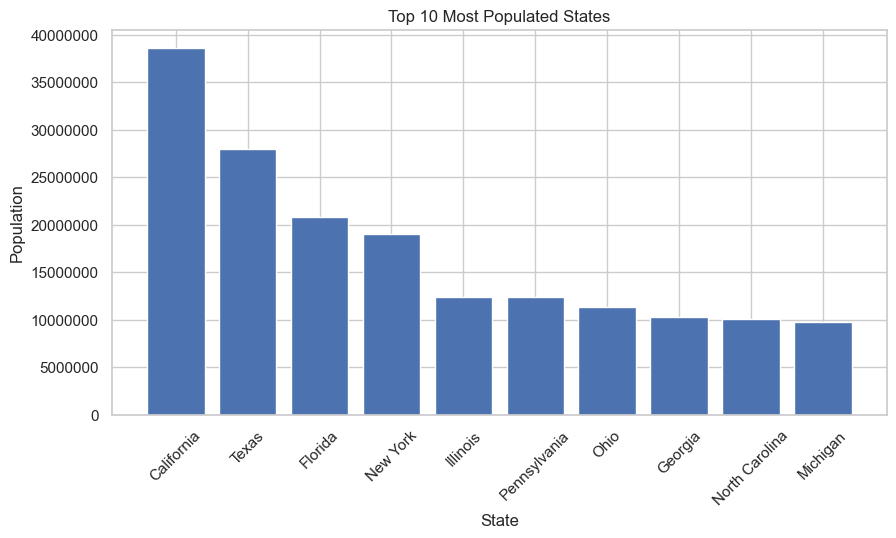

In [69]:
# Sort DataFrame by population in descending order
population_sorted = poverty_df.sort_values(by='Population', ascending=False)

# Select the top 10 most populated states
top10_pop = population_sorted.head(10)

# Plot the bar chart
plt.figure(figsize=(10, 5))
plt.bar(top10_pop['State or territory'], top10_pop['Population'])
plt.xlabel('State')
plt.ylabel('Population')
plt.title('Top 10 Most Populated States')
plt.xticks(rotation=45)
# Disable scientific notation on the y-axis
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Surprisingly, the top 3 US states in homicide count appear in the top 10 most populated states in the US, where California and Texas maintain the same ranking of first and second respectively. Following that, Illinois and Pennsylvania take on fifth and second ranks. <br>
<br>
All in all, almost all top US states with homicides that we saw previously are ranked in the top most populated states in the United States.

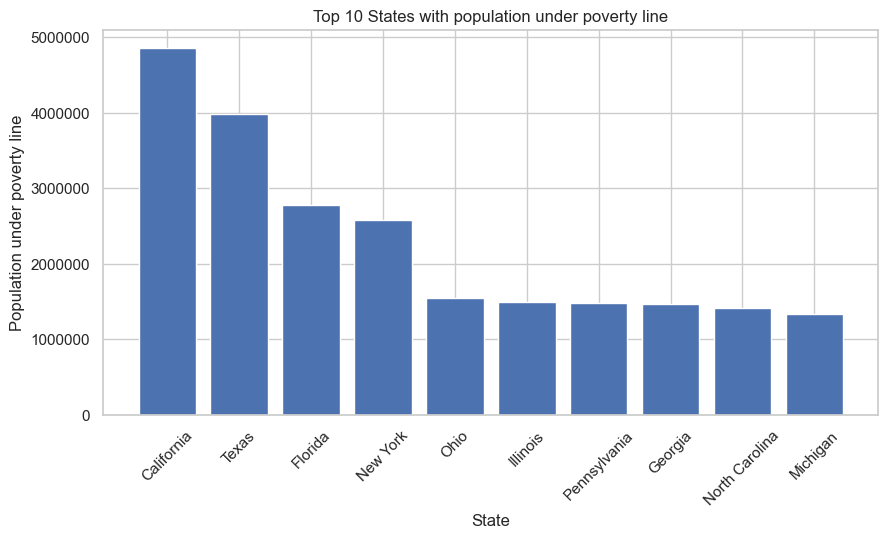

In [70]:
# Sort DataFrame by poverty in descending order
poverty_sorted = poverty_df.sort_values(by='Population underpoverty line', ascending=False)

# Select the top 10 most poor states
top10_pov = poverty_sorted.head(10)

# Plot the bar chart
plt.figure(figsize=(10, 5))
plt.bar(top10_pov['State or territory'], top10_pov['Population underpoverty line'])
plt.xlabel('State')
plt.ylabel('Population under poverty line')
plt.title('Top 10 States with population under poverty line')
plt.xticks(rotation=45)
# Disable scientific notation on the y-axis
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Here, we can see the top 10 US states with population under poverty line, and we can also see 6 out of 10 states (California, Texas, Florida, Illinois, Pennsylvania, Michigan) that have appeared in the top 10 states with homicides previously.

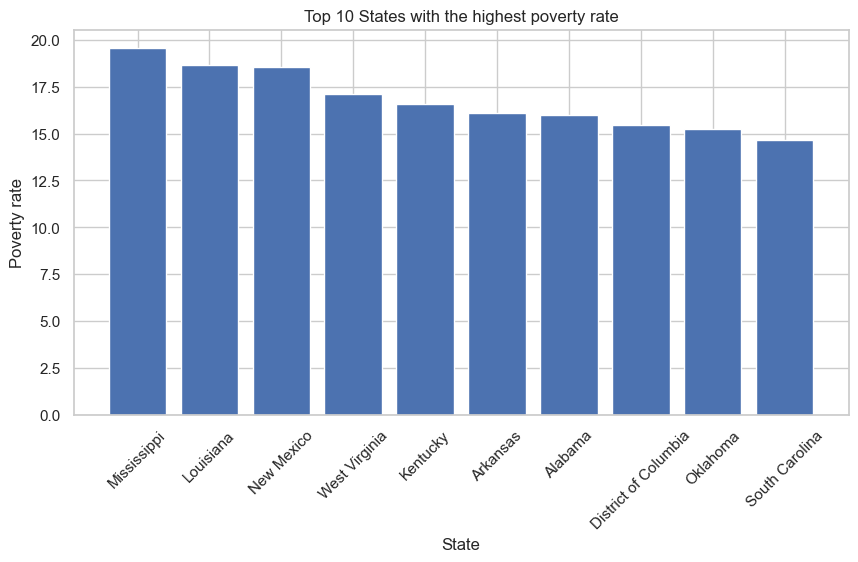

In [71]:
# Sort DataFrame by poverty rate in descending order
rate_sorted = poverty_df.sort_values(by='Poverty rate', ascending=False)

# Select the top 10 highest poverty rate
top10_rate = rate_sorted.head(10)

# Plot the bar chart
plt.figure(figsize=(10, 5))
plt.bar(top10_rate['State or territory'], top10_rate['Poverty rate'])
plt.xlabel('State')
plt.ylabel('Poverty rate')
plt.title('Top 10 States with the highest poverty rate')
plt.xticks(rotation=45)
# Disable scientific notation on the y-axis
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In the above graph, we can see top 10 US states with the highest poverty rates. However, we can only see one of the states that has appeared in the 'top 10 US states with homicides' graph, so let's see if anymore states appear in the top 10 states with the highest poverty rates.

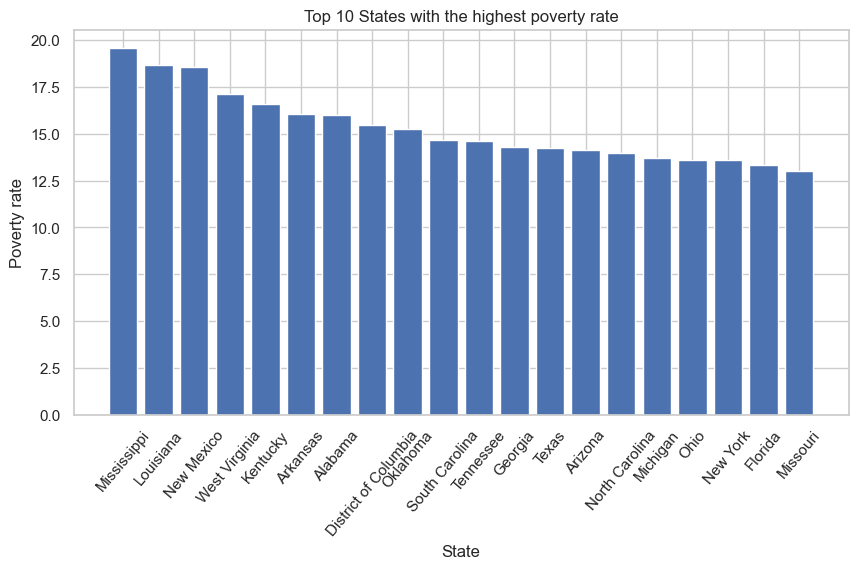

In [72]:
# Sort DataFrame by poverty rate in descending order
rate_sorted = poverty_df.sort_values(by='Poverty rate', ascending=False)

# Select the top 10 highest poverty rate
top10_rate = rate_sorted.head(20)

# Plot the bar chart
plt.figure(figsize=(10, 5))
plt.bar(top10_rate['State or territory'], top10_rate['Poverty rate'])
plt.xlabel('State')
plt.ylabel('Poverty rate')
plt.title('Top 10 States with the highest poverty rate')
plt.xticks(rotation=50)
# Disable scientific notation on the y-axis
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Here, when we extended the graph to include the top 20 US states with the highest poverty rate, we can see more states from the previously seen 'top 10 US states with homicides' graph, such as : Tennessee, Texas, Michigan, Florida and Missouri.<br>
<br>
Therefore, from our analysis of the additional data we can see clear correlation between population count, poverty and criminal homicides in various US states.

In [73]:
# print top 10 poorest states/territories
print(top10_pov)

   State or territory  Population  Population underpoverty line  Poverty rate
24         California    38589882                       4853434         12.58
12              Texas    28013446                       3984260         14.22
18            Florida    20793628                       2772939         13.34
17           New York    19009098                       2581048         13.58
16               Ohio    11350378                       1546011         13.62
26           Illinois    12418504                       1488670         11.99
27       Pennsylvania    12387061                       1480430         11.95
11            Georgia    10238369                       1461572         14.28
14     North Carolina    10098330                       1411939         13.98
15           Michigan     9753541                       1337256         13.71


## 3.4 Geographic variations
### Further geographic visualizations
In this section, I decided to further visualize the homicide hotspots using the folium library, by drawing colored dots on the maps to better understand the location and distribution of homicides geographically in US states/cities.<br>
(zoom-in and zoom-out are available on the top-left of the map to facilitate navigation)
<br>
<br>
The folium library downloads the map files when the code is run, and it doesn't require to have map files downloaded locally in advance, thus, it is suitable for this project.

In [74]:
# dropping na lat and lon values here to not influence other calculations
hom_df_maps = hom_df.dropna(axis=0)

During the data cleaning process, the latitude and longitude colums had null values but they weren't dropped to avoid affecting calculations and accuracy of analysis. However, for the purpose of drawing the maps null latitude and longitude values were dropped.

In [75]:
# # create the map from lat and lon values
# homicide_map = folium.Map(location=[hom_df_maps['lat'].mean(), hom_df_maps['lon'].mean()], zoom_start=4)

# # draw the circles
# for index, row in hom_df_maps.iterrows():
#     folium.CircleMarker(
#         location=(row['lat'], row['lon']),
#         radius=1,
#         color='red',
#         fill=True,
#     ).add_to(homicide_map)

# homicide_map.save('homicide_map.html')

In [76]:
# homicide_map

In [77]:
# from folium.plugins import MarkerCluster

# # Create a base map
# homicide_bubble = folium.Map(location=[hom_df_maps['lat'].mean(), hom_df_maps['lon'].mean()], zoom_start=4)
# # Create a MarkerCluster layer
# marker_cluster = MarkerCluster().add_to(homicide_bubble)
# # Add bubbles to the map based on the number of homicides
# for index, row in hom_df_maps.iterrows():
#     folium.CircleMarker(
#         location=(row['lat'], row['lon']),
#         radius=row['crime_count'] / 5,  # Adjust the divisor to control bubble size
#         color='red',
#         fill=True,
#         fill_color='red',
#         fill_opacity=0.6,
#         popup=f'City: {row["city"]}\nHomicides: {row["crime_count"]}'
#     ).add_to(marker_cluster)

# # Save map to HTML file
# homicide_bubble.save('homicide_bubble_map.html')

In [78]:
# homicide_bubble

## 3.5 demographic analysis
### 3.5.1 Victim Demographics: Race
In the section, we will be exploring trends and patterns in homicide victims race.

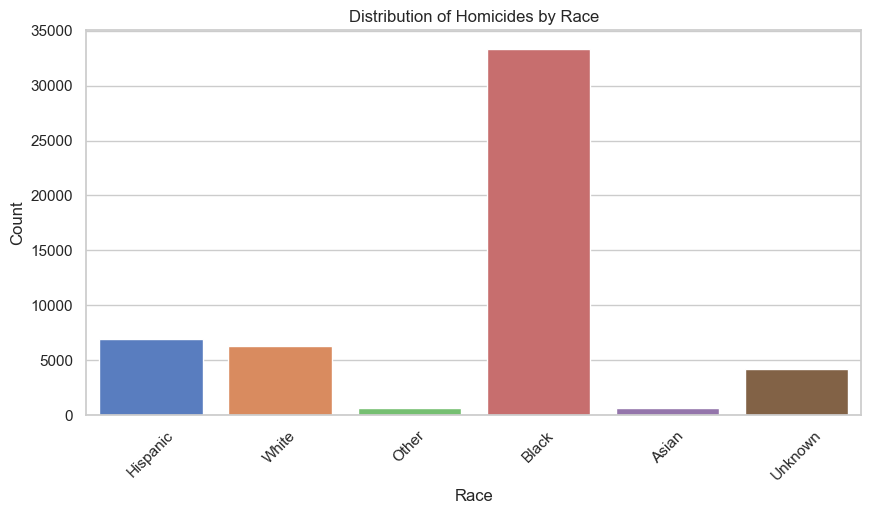

In [79]:
plt.figure(figsize=(10, 5))
sns.countplot(data=hom_df, x='victim_race', palette='muted')
# set labels and title
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Distribution of Homicides by Race')
# rotate x-axix abels for better readability
plt.xticks(rotation=45)
# display the plot
plt.show()

In the above graph, we can observe the distribution of homicides by race. Notably, the graph reveals that Black individuals occupy the highest position followed by, Hispanic, White .. etc.
<br>
<br>
The distribution of victims race raises poignant questions about the underlying factors contributing to the observed patterns. While the variations in numbers are clear, the qualitative features of these discrepancies demand more investigation.

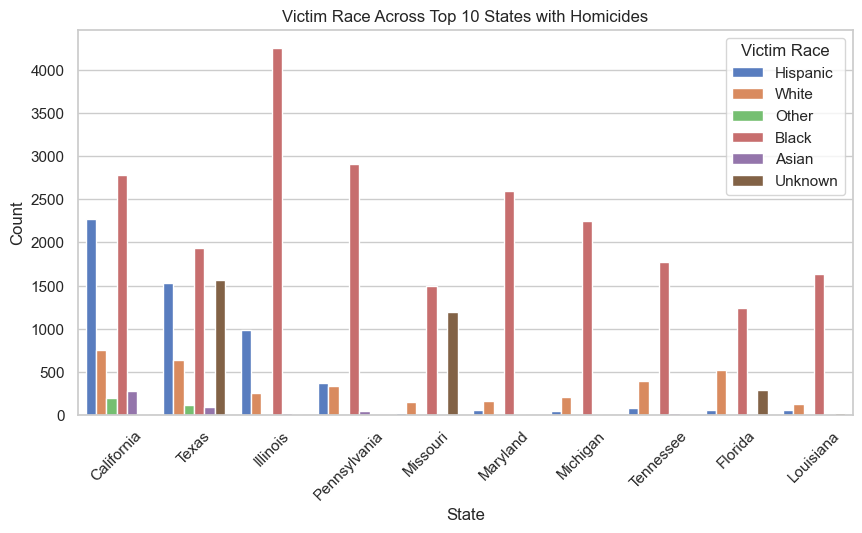

In [80]:
plt.figure(figsize=(10, 5))

sns.countplot(data=hom_df, x='state', hue='victim_race', palette='muted', order=hom_df['state'].value_counts().index[:10])

# Set labels and title
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Victim Race Across Top 10 States with Homicides')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the legend
plt.legend(title='Victim Race')

# Show the plot
plt.show()

Here, we can see some interesting patterns, while Black individuals are still the highest victim race, Hispanic individuals appear to hold significant numbers especially in top 4 US states with the highest homicide count.

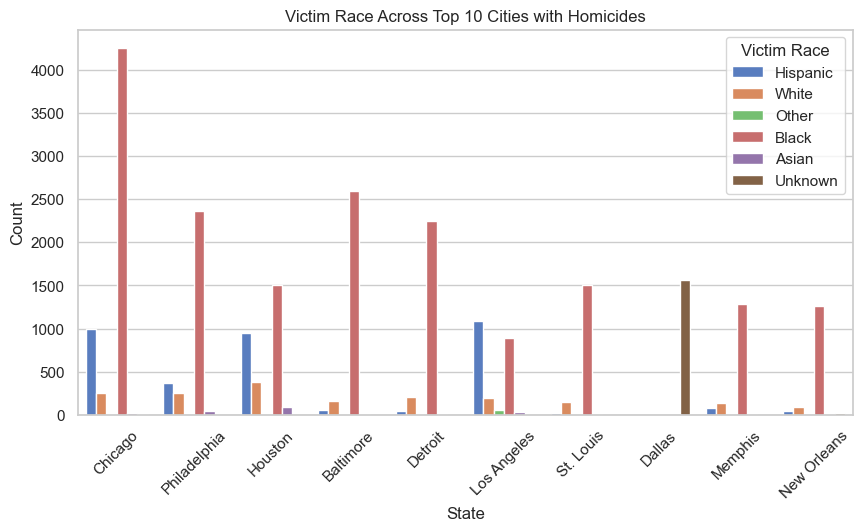

In [81]:
plt.figure(figsize=(10, 5))

sns.countplot(data=hom_df, x='city', hue='victim_race', palette='muted', order=hom_df['city'].value_counts().index[:10])

# Set labels and title
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Victim Race Across Top 10 Cities with Homicides')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the legend
plt.legend(title='Victim Race')

# Show the plot
plt.show()

Here, we can observe similar patterns to the previous graph. Moreover, the city of Chicago holds the highest homicide count of black individuals, Chicago is a city in Illinois which held the highest black individuals count as seen previously.

### 3.5.1 Victim Demographics: Age
Next, we will be exploring trends and patterns in homicide victims age.

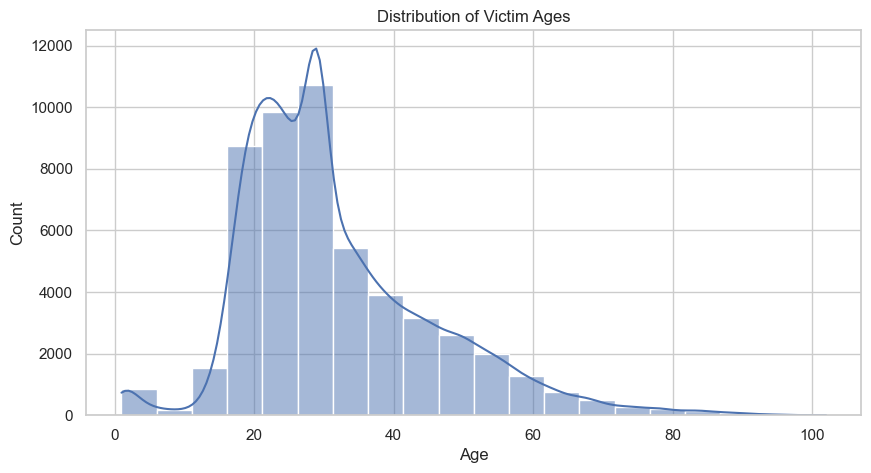

In [82]:
plt.figure(figsize=(10, 5))

sns.histplot(data=hom_df, x='victim_age', bins=20, kde=True)

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Victim Ages')

# Show the plot
plt.show()

In the given graph, we can observe that the age range most common in homicide victims, is from around 20 to 40 years. Whereas, people younger than 20 and people older than 50 have rather lower homicide counts.

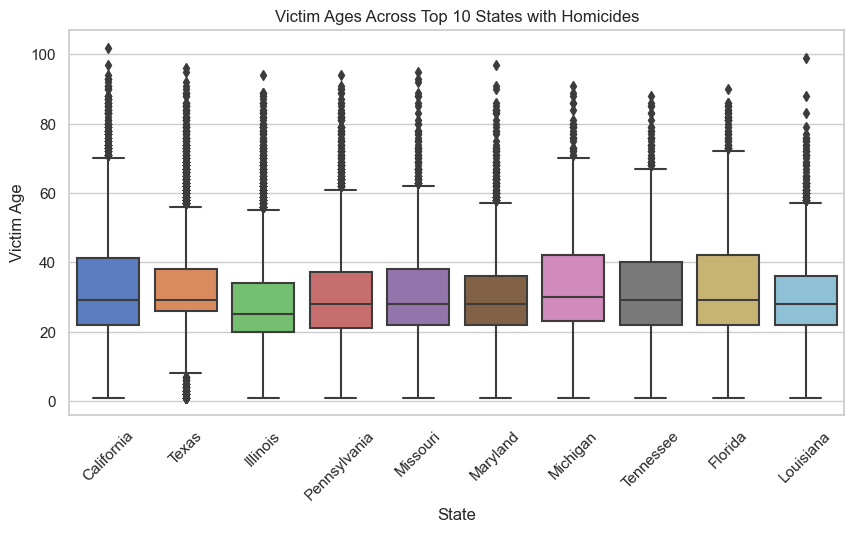

In [83]:
# Create a box plot
plt.figure(figsize=(10, 5))

sns.boxplot(x='state', y='victim_age', data=hom_df, palette='muted', order=hom_df['state'].value_counts().index[:10])

# Set labels and titles
plt.xlabel('State')
plt.ylabel('Victim Age')
plt.title('Victim Ages Across Top 10 States with Homicides')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

Here, we can see there isn't much variation in the prominent age range, which was expected given the previous graph.

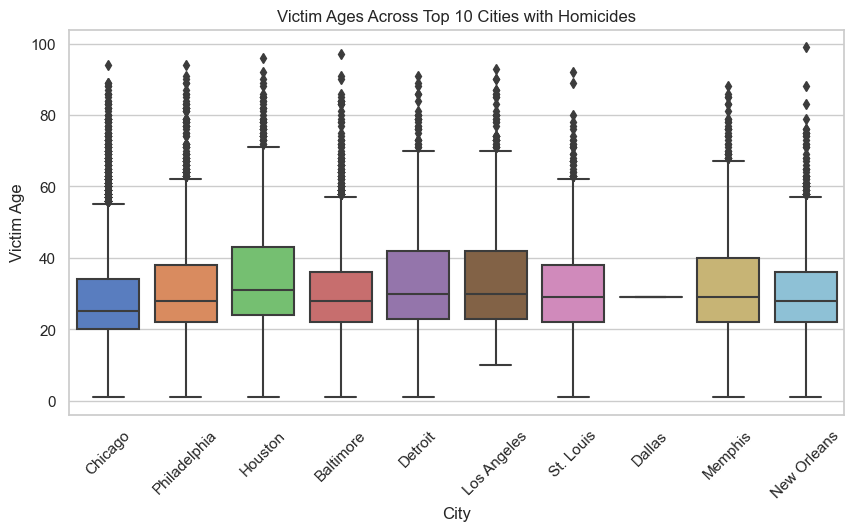

In [84]:
# Create a box plot
plt.figure(figsize=(10, 5))

sns.boxplot(x='city', y='victim_age', data=hom_df, palette='muted', order=hom_df['city'].value_counts().index[:10])

# Set labels and titles
plt.xlabel('City')
plt.ylabel('Victim Age')
plt.title('Victim Ages Across Top 10 Cities with Homicides')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

In the given box plot, we can observe once again similar age range (20-40) as seen previously. Unfortunately, I have observed that the city of Dallas, though it is one of the top 10 US cities with homicides, all victim demographic data is missing for it in this dataset (all values are "Unknown").

### 3.5.1 Victim Demographics: Sex
In the following section, we will be analyzing the distribution of homicides by victims Sex and identifying patterns/trends.

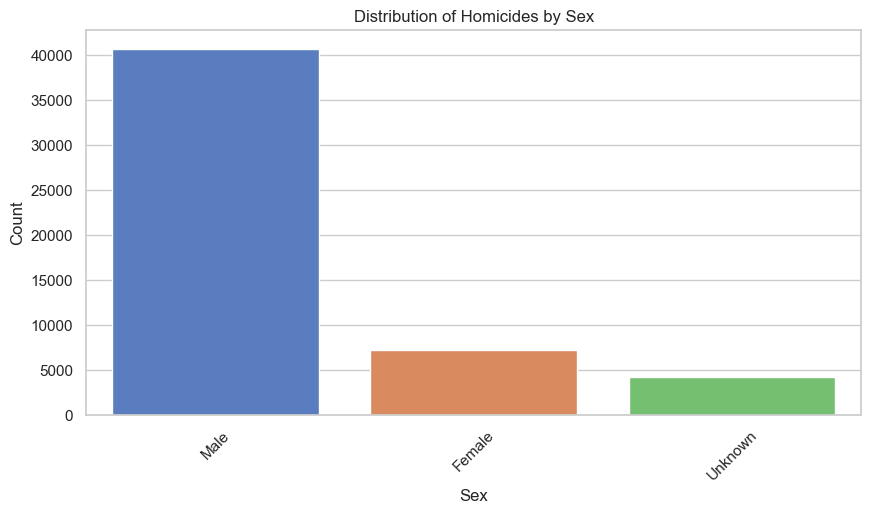

In [85]:
plt.figure(figsize=(10, 5))
sns.countplot(data=hom_df, x='victim_sex', palette='muted')

# set labels and title
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Homicides by Sex')

# rotate x-axix abels for better readability
plt.xticks(rotation=45)
# display the plot
plt.show()

In the above box plot, we can observe that the most prominent Sex in homicide victims is Male, which is significantly higher than Female.

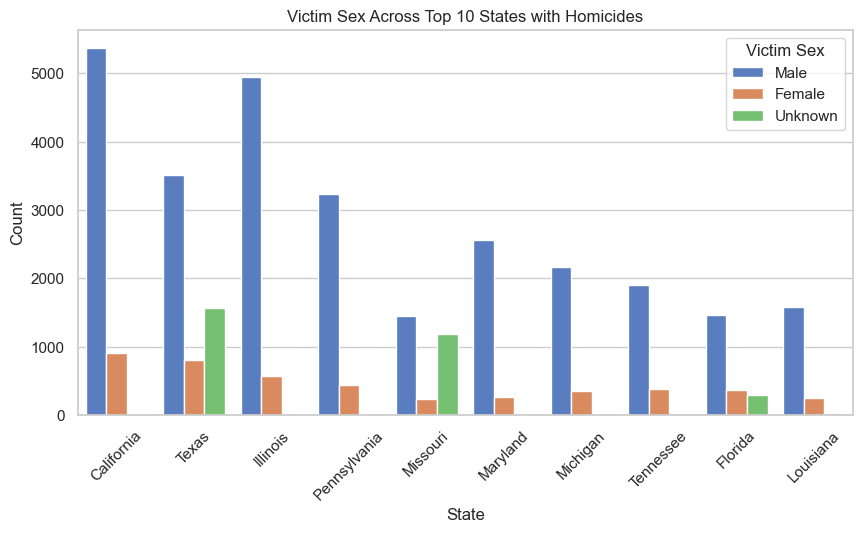

In [86]:
plt.figure(figsize=(10, 5))

sns.countplot(data=hom_df, x='state', hue='victim_sex', palette='muted', order=hom_df['state'].value_counts().index[:10])

# Set labels and title
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Victim Sex Across Top 10 States with Homicides')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the legend
plt.legend(title='Victim Sex')

# Show the plot
plt.show()

Here, we can see in this count plot that Males are the most prominent gender in all top US states with homicides, where the highest count was recorded in California.

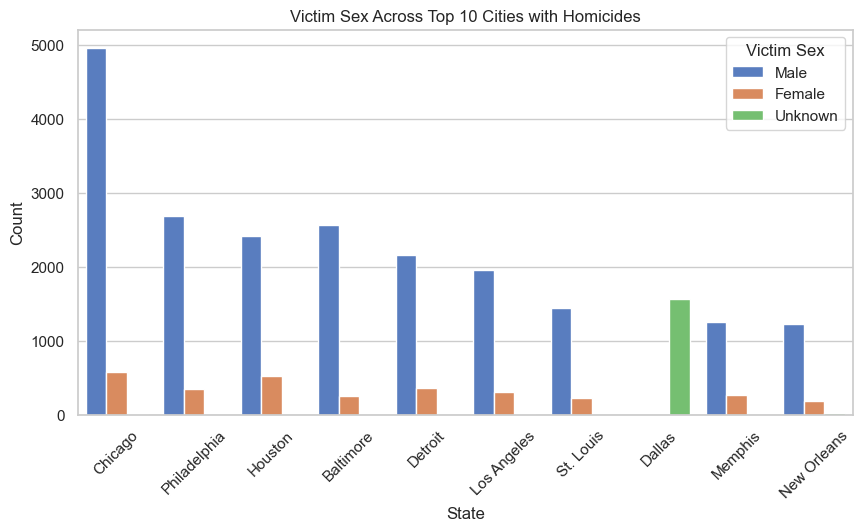

In [87]:
plt.figure(figsize=(10, 5))

sns.countplot(data=hom_df, x='city', hue='victim_sex', palette='muted', order=hom_df['city'].value_counts().index[:10])

# Set labels and title
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Victim Sex Across Top 10 Cities with Homicides')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the legend
plt.legend(title='Victim Sex')

# Show the plot
plt.show()

For the given graph, we can notice the similar patterns to the previous visualizations. However, Chicago, a city in Illinois has a significantly higher count of Male homicide victims than the rest of the cities.

### 3.5.2 Intersectional Analysis
In this section, we will be discovering if victim characteristics intersect with eachother and identifying subgroups that are more prone to criminal homicides.

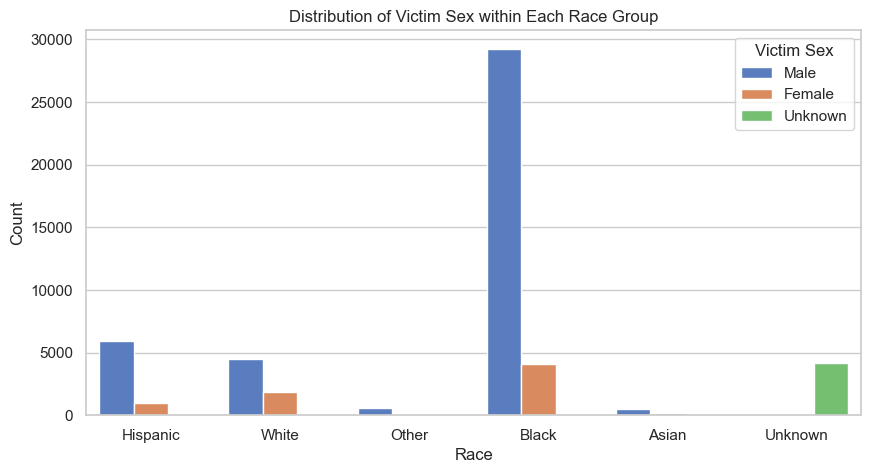

In [88]:
# Create a bar chart
plt.figure(figsize=(10, 5))

sns.countplot(x='victim_race', hue='victim_sex', data=hom_df, palette='muted')

# Set labels and title
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Distribution of Victim Sex within Each Race Group')

# Display the legend
plt.legend(title='Victim Sex')
plt.show()

Here, we will be analyzing the distribution of victims gender whithin each race group. 
<br>
<br>
We can see that the Male gender is prominent in each race group, especially black individuals. Thus, the subgroups most prone to homicide are Black Males, Hispanic Males and then White Males.

### 3.5.1 Victim Demographics: 
Finally, let's explore the disposition of criminal homicides cases in the US, its distribution geographically and investigate any correlation between victim demographics and disposition.

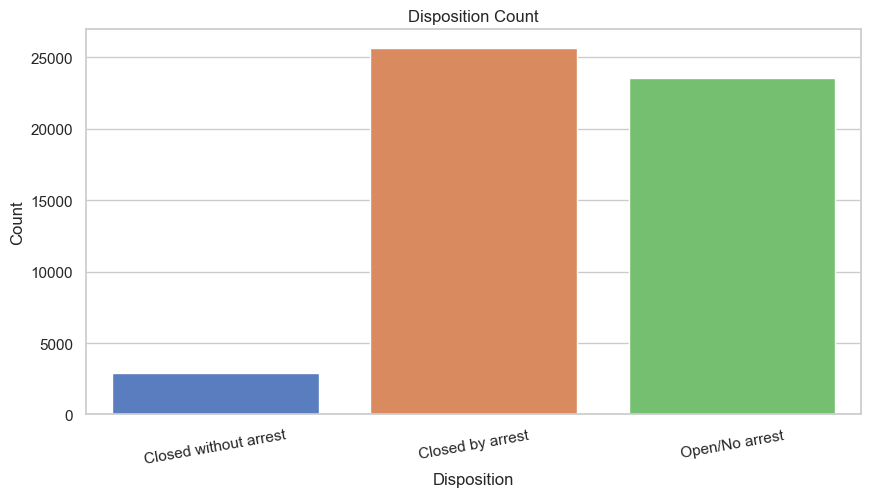

In [89]:
plt.figure(figsize=(10, 5))
sns.countplot(data=hom_df, x='disposition', palette='muted')

# set labels and title
plt.xlabel('Disposition')
plt.ylabel('Count')
plt.title('Disposition Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=10)
# display the plot
plt.show()

In the above box plot, we can observ the distribution of the disposition of homicide cases, where the most common disposition is 'closed by arrest' followed by 'open/no arrest' and finally with a much lower count 'closed without arrest'.
<br>
<br>
Let's discover more dynamics and patterns concerning the disposition of cases and its correltion with victim demographics.

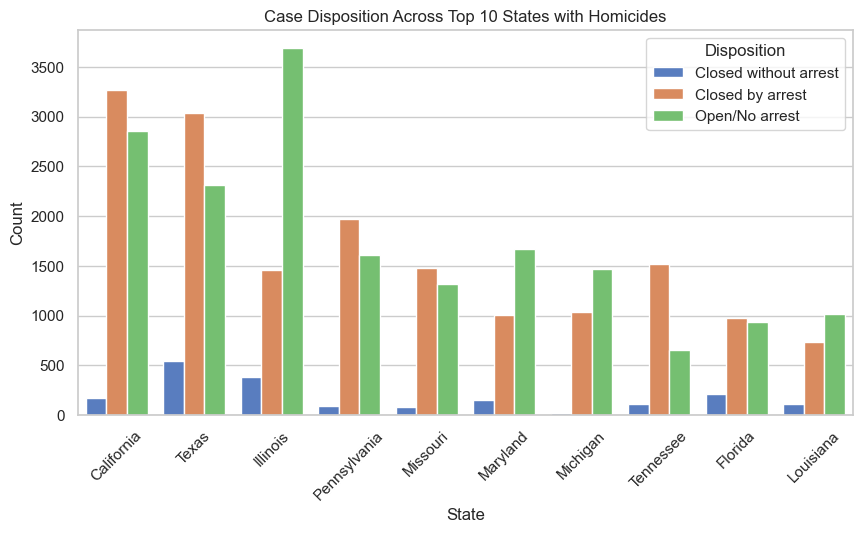

In [90]:
plt.figure(figsize=(10, 5))

sns.countplot(data=hom_df, x='state', hue='disposition', palette='muted', order=hom_df['state'].value_counts().index[:10])

# Set labels and title
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Case Disposition Across Top 10 States with Homicides')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the legend
plt.legend(title='Disposition')

# Show the plot
plt.show()

In the above visualization, we can observe the following:
- The state of Illinois has a significantly higher count of 'Open/no arrest' disposition of homicide cases.
- The state of California has the highest 'Closed by arrest' disposition of homicide cases.
- The state of Texas has the highest 'Closed without arrest' disposition of homicide cases.

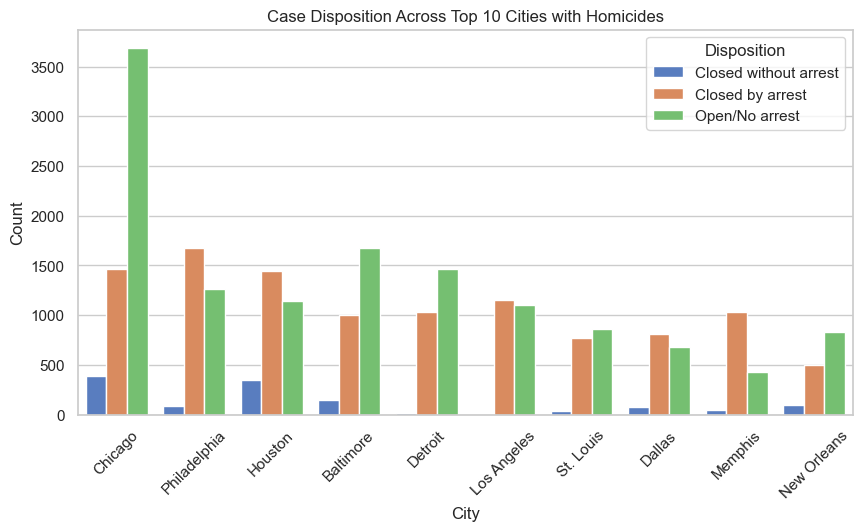

In [91]:
plt.figure(figsize=(10, 5))

sns.countplot(data=hom_df, x='city', hue='disposition', palette="muted", order=hom_df['city'].value_counts().index[:10])

# Set labels and title
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Case Disposition Across Top 10 Cities with Homicides')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the legend
plt.legend(title='Disposition')

# Show the plot
plt.show()

Here, we can note the following:
- The city of Chicago (is a city of the state of Illinois) has the highest 'Open/no arrest' disposition of homicide cases by a significant difference.
- The city of Philadelphia has the highest 'Closed by arrest' disposition of homicide cases.
- The city of Chicago also has the highest 'Closed without arrest' disposition of homicide cases.

<Figure size 1000x600 with 0 Axes>

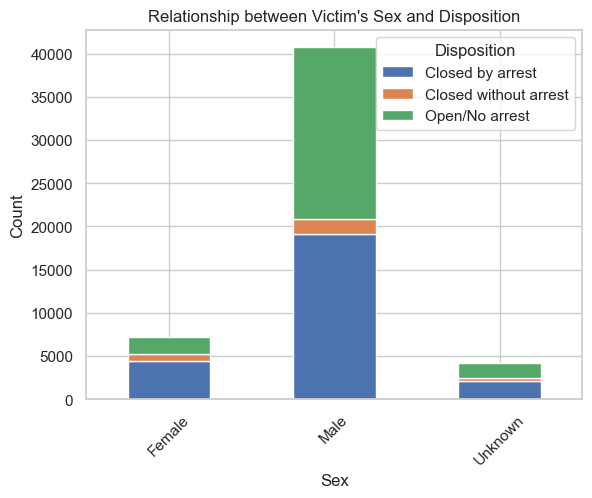

In [92]:
# Create a stacked bar chart
cross_table = pd.crosstab(hom_df['victim_sex'], hom_df['disposition'])

plt.figure(figsize=(10, 6))
cross_table.plot(kind='bar', stacked=True)

# set labels and title
plt.title("Relationship between Victim's Sex and Disposition")
plt.xlabel('Sex')
plt.ylabel('Count')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# display the legend
plt.legend(title='Disposition')
# display the plot
plt.show()

In the above stacked bar chart, we can remark the following:
- For the Male gender the 'Closed by arrest' disposition of homicide cases has the smallest count and 'Closed without arrest' is a bit more prominent. However, the 'Open/no arrest' disposition of homicide cases is highest, or almost double the amount of the 'Closed by arrest' disposition.
- For Females, the highest is 'Open/no arrest' disposition, then 'Closed without arrest', and finally, the 'Closed by arrest' dispostition.

<Figure size 1000x600 with 0 Axes>

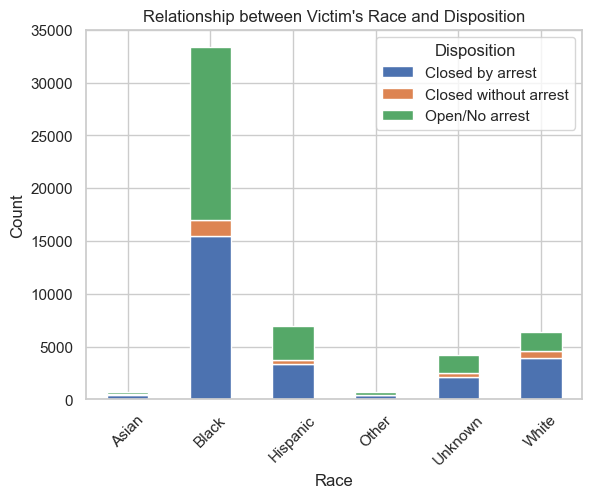

In [93]:
# Create a stacked bar chart
cross_table = pd.crosstab(hom_df['victim_race'], hom_df['disposition'])

plt.figure(figsize=(10, 6))
cross_table.plot(kind='bar', stacked=True)

# set labels and title
plt.title("Relationship between Victim's Race and Disposition")
plt.xlabel('Race')
plt.ylabel('Count')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# display the legend
plt.legend(title='Disposition')
# display the plot
plt.show()

In this last and final visualization, we are exploring the relationship/correlation between the victims race and the disposition of the homicide cases. <br>
<br>
In the given visualization, we can remark the following:
- The 'Closed by arrest' disposition is most common whithin Black individuals, followed by White and Hispanic individuals which have close counts of the latter disposition.
- The 'Closed without arrest' disposition is highest in Black individuals, then White and Hispanic individuals.
- The 'Open/no arrest' disposition is most prominent whithin the Black race, which is significantly higher than all other counts. Moreover, the 'Open/no arrest' disposition of homicide cases is the most common disposition in all victim races.

## 4 Conclusion
Through the exploratory data analysis, we have been able to see that there is a strong correlation between homicide rates and population counts and also homicide rate and poverty rate. Furthermore, we were able to analyze a lot of different dynamics surrounding homicides in the United States, from which there were many significant observations. Therefore, the data used in this project has proved to be viable for further exploration 
<br>
<br>
Moreovermore, the major flaw in this data was the 'Unknown' values that if removed would affect the calculations and when left they didn't have much significance in our analysis. Due to time constraints, a suitable method to handle those values was not found.
<br>
<br>
All in all, this project has been an amazing learning journey and a great introduction to the field of EDA.

## 5 Resources and References:
### 5.1 Resources Used:


#### Data cleaning and processing
- Natural Language Processing lab, Dr Sean McGrath
- The python for Data analysis book, by Wes McKinney
- Data Analysis with Python course, by FreeCodeCamp. Link: https://youtu.be/r-uOLxNrNk8?si=TN4T1a2T3Q95IHbs

#### Webscraping
- Webscraping lecture and lab, Dr Sean McGrath
- https://www.crummy.com/software/BeautifulSoup/bs4/doc/
- https://www.scrapingbee.com/blog/python-web-scraping-beautiful-soup/
- https://developer.mozilla.org/en-US/docs/Glossary/Request_header

#### Exploratory data analysis
- Natural Language Processing lab, Dr Sean McGrath
- K. Fessel. (2020, June 29). Introduction to Seaborn YouTube series [Online]. Link: https://www.youtube.com/playlist?list=PLtPIclEQf-3cG31dxSMZ8KTcDG7zYng1j
- Homicide dataset notebooks on Kaggle. Link: https://www.kaggle.com/datasets/joebeachcapital/homicides/code

### 5.2 References:
[1] Robert Roth. (2013). *U.S Departement of Justice, Office of Justice Programs*. Link: https://www.ojp.gov/ncjrs/virtual-library/abstracts/why-united-states-most-homicidal-nation-affluent-world
<br>
[2] Rebecca Lindsey, (2023, July 19). *Past and future temperatures in the United States' hottest month of the year*
Link: https://www.climate.gov/news-features/featured-images/past-and-future-temperatures-united-states-hottest-month-year#:~:text=On%20average%2C%20July%20is%20the,1.66%20degrees%20F%20per%20century
<br>
[3] John Harrington, (2021, Nov. 20). *With winter weather and cold temperatures approaching, what's the coldest town in your state?* Link: https://www.usatoday.com/story/news/nation/2021/11/30/winter-weather-coldest-towns-us/8805820002/#:~:text=In%2045%20states%2C%20the%20coldest,coldest%20months%20in%20other%20states

## Packages used

In [94]:
import session_info
session_info.show()

In [98]:
# info = session_info.show()

# # Extract the dependencies section
# dependencies_section = info['jupyter']['base']['packages']

# # Create a list of packages
# requirements_list = [f"{package['name']}=={package['version']}" for package in dependencies_section]

# # Write the list to a requirements.txt file
# with open('requirements.txt', 'w') as file:
#     for requirement in requirements_list:
#         file.write(requirement + '\n')

In [95]:
# pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
